In [501]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from datetime import datetime

train = pd.read_csv(r'C:\Users\Administrator\bike-sharing-demand\\train.csv', parse_dates=["datetime"])
test = pd.read_csv(r'C:\Users\Administrator\bike-sharing-demand\\test.csv')

In [502]:
def seperate_date(train):    
    train['year'] = train['datetime'].dt.year
    train['month'] = train['datetime'].dt.month
    train['day'] = train['datetime'].dt.day
    train['hour'] = train['datetime'].dt.hour
    train['weekend'] = (train['holiday'] + train['workingday'] + 1)%2
    return train
# train.set_index(['datetime'],inplace=True)
# train['windspeed'].interpolate(method='nearest',limit_direction ='backward',inplace=True)
# train['windspeed'].value_counts().sort_index()
def windspeed_fillna(train):
    train.loc[train['windspeed'] == 0, 'windspeed'] = np.nan
    train['windspeed'] = train['windspeed'].fillna(method='bfill')
    return train
def train_grouping(train):
    train['temp'].value_counts().sort_index()
    train['temp'] = pd.qcut(train['temp'],10,['temp0','temp1','temp2','temp3','temp4','temp5','temp6','temp7','temp8','temp9'])
    train['atemp'] = pd.qcut(train['atemp'],10,['atemp0','atemp1','atemp2','atemp3','atemp4','atemp5','atemp6','atemp7','atemp8','atemp9'])
    train['windspeed'] = pd.qcut(train['windspeed'],10,['wind0','wind1','wind2','wind3','wind4','wind5','wind6','wind7','wind8'],duplicates='drop')
    return train

In [503]:
train = seperate_date(train)
train = windspeed_fillna(train)
train = train_grouping(train)
train = train[train['count'] - train['count'].mean() < 3*train['count'].std()]

In [504]:
train['windspeed'].value_counts()

wind0    2665
wind1    1319
wind2    1154
wind7    1149
wind3    1108
wind4     968
wind5     854
wind8     841
wind6     681
Name: windspeed, dtype: int64

In [505]:
train.groupby(['weekend','workingday','holiday'])[['count']].describe()
train.groupby(['season'])[['count']].describe()

count                                                        
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2682.0  115.369128  122.795534  1.0  24.0   78.0  163.0  734.0
2       2694.0  206.779510  179.848435  1.0  47.0  169.0  313.0  733.0
3       2664.0  219.048048  174.467302  1.0  64.0  189.0  332.0  730.0
4       2699.0  190.904039  163.720771  1.0  50.0  157.0  285.0  731.0

In [506]:
train.groupby(['year','month'])[['count']].describe()


count                                                          
            count        mean         std  min    25%    50%     75%    max
year month                                                                 
2011 1      431.0   54.645012   47.606250  1.0  15.50   47.0   79.00  219.0
     2      446.0   73.641256   63.572141  1.0  21.25   59.0  109.75  327.0
     3      446.0   86.849776   79.278388  1.0  18.00   72.0  123.75  332.0
     4      455.0  111.026374  102.163250  1.0  25.00   84.0  165.50  452.0
     5      456.0  174.809211  144.160643  1.0  50.00  154.0  261.00  611.0
     6      456.0  196.877193  151.296297  1.0  70.50  172.0  309.50  638.0
     7      456.0  203.614035  153.082654  1.0  70.50  173.0  317.25  596.0
     8      456.0  182.666667  146.661600  1.0  61.00  159.0  271.75  600.0
     9      453.0  174.622517  144.877431  1.0  45.00  147.0  280.00  628.0
     10     455.0  174.773626  149.749304  1.0  52.50  140.0  248.00  625.0
     11     456.0  155.458333  129.374278  1.0  45.75  133.5  228.75  553.0
     12     456.0  134.173246  113.485627  1.0  33.00  110.5  206.00  477.0
2012 1      453.0  124.353201  114.946616  1.0  32.00   93.0  181.00  512.0
     2      455.0  145.646154  131.784817  1.0  35.50  118.0  215.00  539.0
     3      451.0  203.299335  178.450956  1.0  49.00  169.0  299.00  734.0
     4      443.0  244.787810  199.901198  1.0  62.00  224.0  373.50  729.0
     5      445.0  250.705618  201.572827  1.0  67.00  230.0  372.00  733.0
     6      439.0  266.635535  208.493716  4.0  70.00  246.0  421.50  724.0
     7      440.0  247.436364  183.051297  2.0  81.00  237.0  369.00  730.0
     8      432.0  255.564815  191.395499  3.0  67.75  248.5  382.25  730.0
     9      427.0  255.316159  202.825894  3.0  69.50  219.0  397.50  730.0
     10     423.0  237.895981  184.994399  2.0  58.00  220.0  370.50  715.0
     11     455.0  231.980220  187.447854  1.0  70.50  202.0  358.00  724.0
     12     454.0  214.702643  176.738260  1.0  63.25  190.5  311.50  731.0

In [507]:
# Sex(남/여), Pclass(1/2/3), Embarked(C/Q/S)
# 10, 100,   
# 01, 010
#   , 001
dummy_columns=["season"]

def myDummy(data, columns):
    for column in columns:
        data=pd.concat([data,pd.get_dummies(data[column], prefix=column)], axis=1)
        data=data.drop(column, axis=1)
    return data

train = myDummy(train, dummy_columns)
train

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekend,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,temp0,atemp1,81,wind0,3,13,16,2011,1,1,0,1,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,temp0,atemp1,80,wind0,8,32,40,2011,1,1,1,1,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,temp0,atemp1,80,wind0,5,27,32,2011,1,1,2,1,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,temp0,atemp1,75,wind0,3,10,13,2011,1,1,3,1,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,temp0,atemp1,75,wind0,0,1,1,2011,1,1,4,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,1,temp3,atemp3,50,wind8,7,329,336,2012,12,19,19,0,0,0,0,1
10882,2012-12-19 20:00:00,0,1,1,temp2,atemp2,57,wind4,10,231,241,2012,12,19,20,0,0,0,0,1
10883,2012-12-19 21:00:00,0,1,1,temp2,atemp2,61,wind4,4,164,168,2012,12,19,21,0,0,0,0,1
10884,2012-12-19 22:00:00,0,1,1,temp2,atemp2,61,wind0,12,117,129,2012,12,19,22,0,0,0,0,1


In [906]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
train = pd.read_csv(r'C:\Users\Administrator\bike-sharing-demand\\train.csv', parse_dates=["datetime"])
test = pd.read_csv(r'C:\Users\Administrator\bike-sharing-demand\\test.csv', parse_dates=["datetime"])
train = train[train['count'] - train['count'].mean() < 3*train['count'].std()]

In [907]:
df=train.copy()
test_df=test.copy()
df.head()

def windspeed_fillna(train):
    train.loc[train['windspeed'] == 0, 'windspeed'] = np.nan
    train['windspeed'] = train['windspeed'].fillna(method='bfill')
    return train
df = windspeed_fillna(df)
test_df = windspeed_fillna(test_df)

In [908]:
df.columns.unique()


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

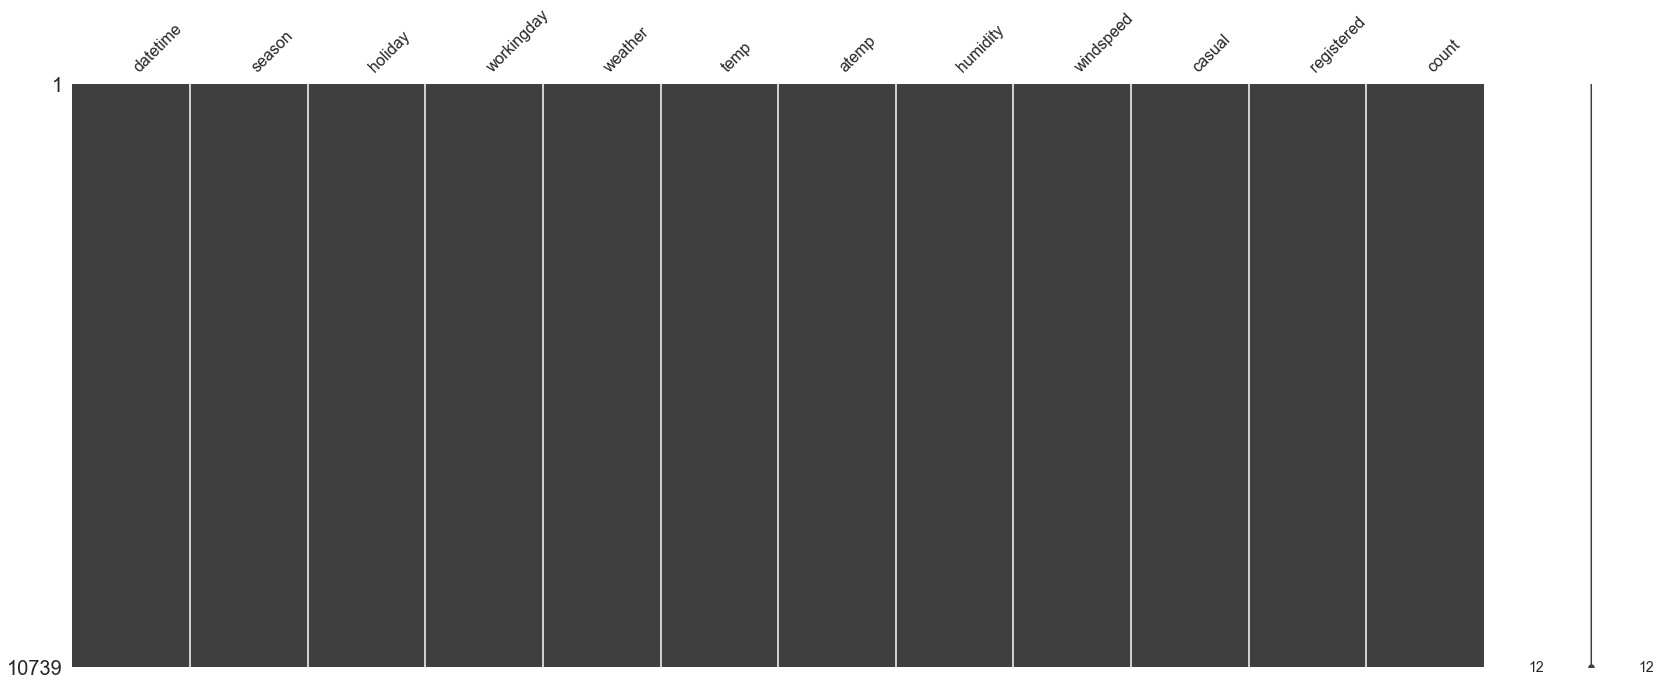

In [909]:
msno.matrix(df)

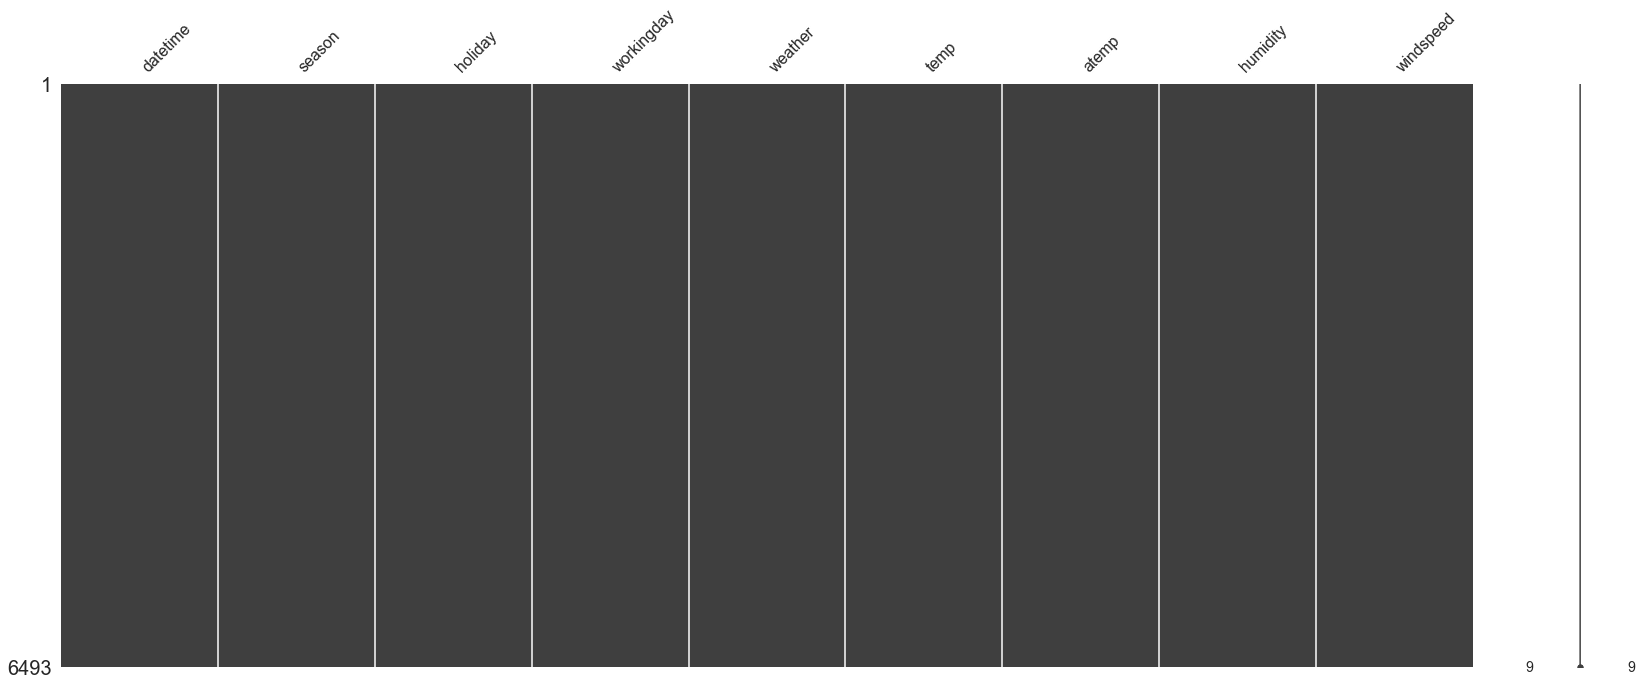

In [910]:
msno.matrix(test_df)

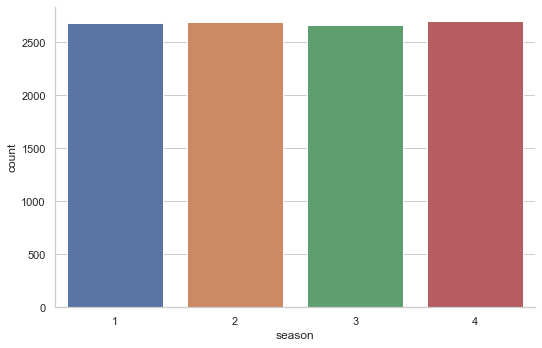

In [911]:
df.season.value_counts()
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

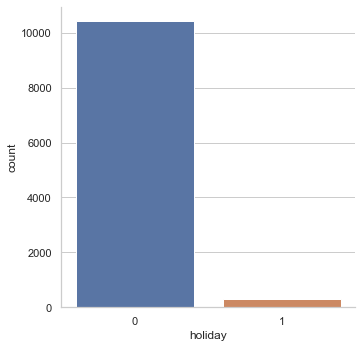

In [912]:
df.holiday.value_counts()
sns.factorplot(x='holiday', data=df, kind='count', size=5, aspect=1)

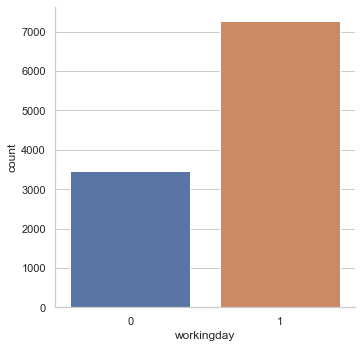

In [913]:
df.workingday.value_counts()
sns.factorplot(x='workingday',data=df,kind='count',size=5,aspect=1)

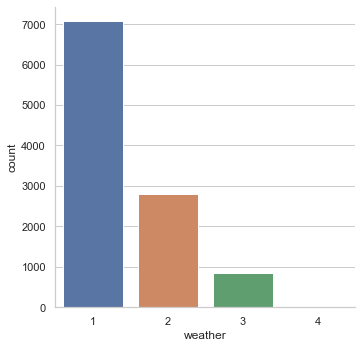

In [914]:
sns.factorplot(x='weather',data=df,kind='count',size=5,aspect=1)  

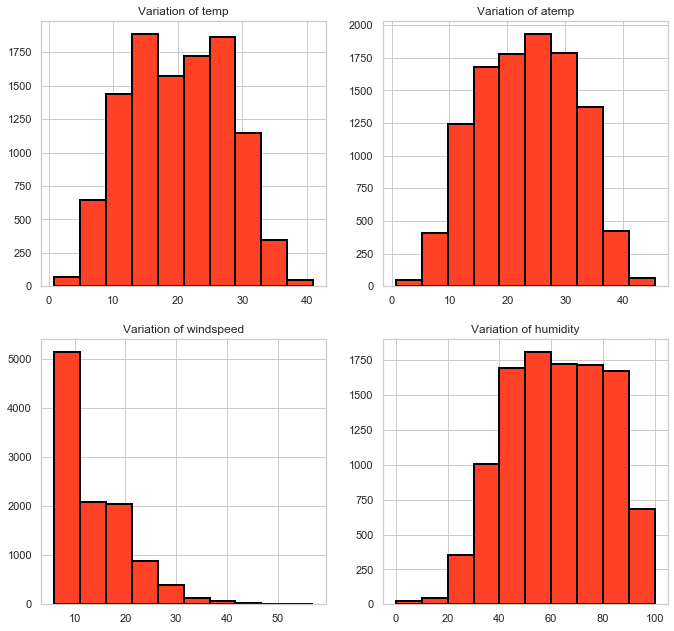

In [915]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

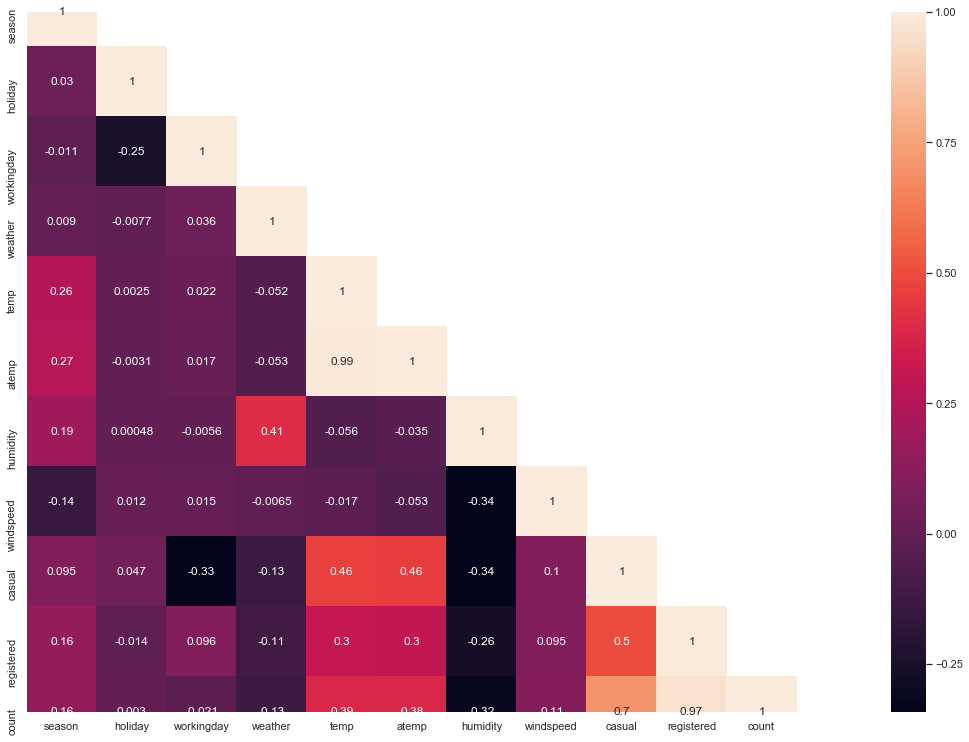

In [916]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [917]:
columns = ['weather','season',]

def dummy(df,colums):
    for column in columns:
        data = pd.get_dummies(df[column],prefix=column)
        df = pd.concat([df,data], axis = 1)
        df.drop(column, inplace=True, axis=1)
    return df

df = dummy(df,columns)
test_df = dummy(test_df,columns)

In [918]:
def seperate_date(train):    
    train['year'] = train['datetime'].dt.year
    train['year'] = train['year'].map({2011:0, 2012:1})
    train['month'] = train['datetime'].dt.month
    train['day'] = train['datetime'].dt.day
    train['hour'] = train['datetime'].dt.hour
    train['weekend'] = (train['holiday'] + train['workingday'] + 1)%2
    train.drop('datetime', inplace=True, axis=1)
    return train

df = seperate_date(df)
test_df = seperate_date(test_df)

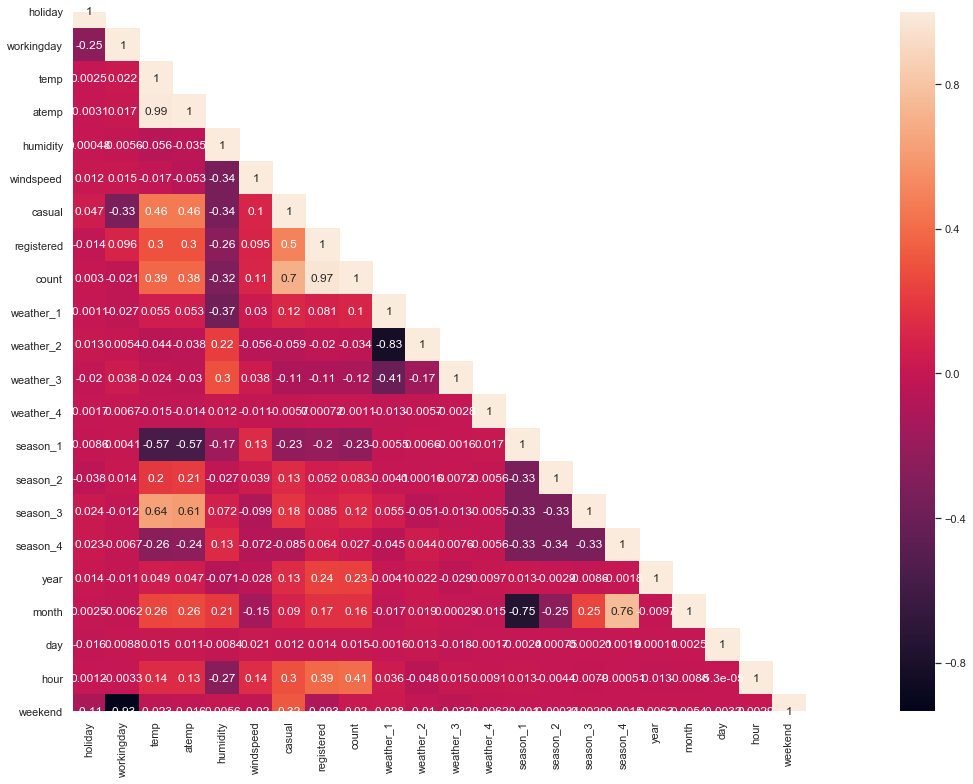

In [919]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [920]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [921]:
df

,holiday,workingday,temp,atemp,humidity,windspeed,count,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,year,month,day,hour,weekend
0,0,0,9.84,14.395,81,6.0032,16,1,0,0,0,1,0,0,0,0,1,1,0,1
1,0,0,9.02,13.635,80,6.0032,40,1,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,9.02,13.635,80,6.0032,32,1,0,0,0,1,0,0,0,0,1,1,2,1
3,0,0,9.84,14.395,75,6.0032,13,1,0,0,0,1,0,0,0,0,1,1,3,1
4,0,0,9.84,14.395,75,6.0032,1,1,0,0,0,1,0,0,0,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,1,0,0,0,0,0,0,1,1,12,19,19,0
10882,0,1,14.76,17.425,57,15.0013,241,1,0,0,0,0,0,0,1,1,12,19,20,0
10883,0,1,13.94,15.910,61,15.0013,168,1,0,0,0,0,0,0,1,1,12,19,21,0
10884,0,1,13.94,17.425,61,6.0032,129,1,0,0,0,0,0,0,1,1,12,19,22,0


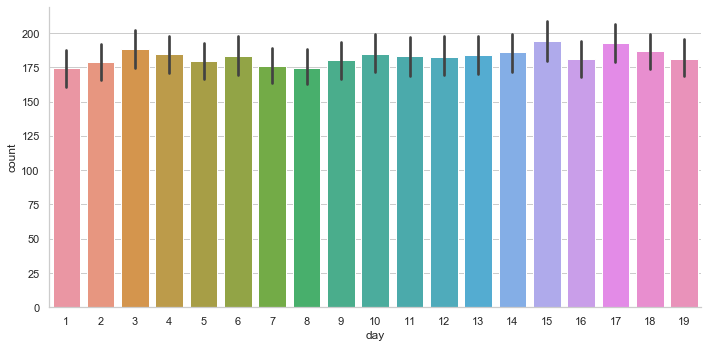

In [922]:
sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=2)


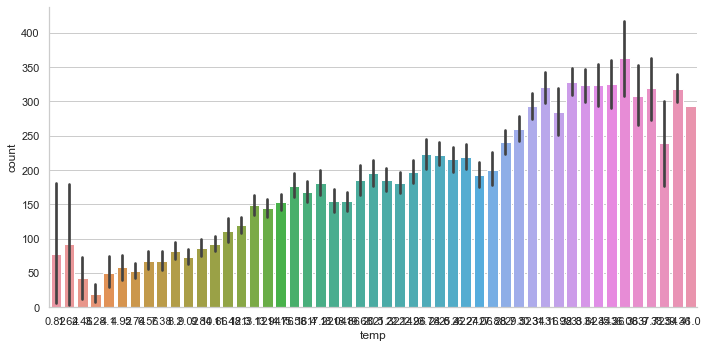

In [923]:
df.temp
sns.factorplot(x="temp",y='count',data=df,kind='bar', size=5,aspect=2)

In [924]:
df.temp = np.floor(df.temp)//10
test_df.temp = np.floor(test_df.temp)//10
df.atemp = np.floor(df.atemp)//10
test_df.atemp = np.floor(test_df.atemp)//10

In [925]:
df.humidity = np.floor(df.humidity/10)
test_df.humidity = np.floor(test_df.humidity/10)
df.windspeed = np.floor(df.windspeed)
test_df.windspeed = np.floor(test_df.windspeed)
# sns.factorplot(x="humidity",y='count',data=df,kind='bar', size=5,aspect=2)
df

,holiday,workingday,temp,atemp,humidity,windspeed,count,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,year,month,day,hour,weekend
0,0,0,0.0,1.0,8.0,6.0,16,1,0,0,0,1,0,0,0,0,1,1,0,1
1,0,0,0.0,1.0,8.0,6.0,40,1,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0.0,1.0,8.0,6.0,32,1,0,0,0,1,0,0,0,0,1,1,2,1
3,0,0,0.0,1.0,7.0,6.0,13,1,0,0,0,1,0,0,0,0,1,1,3,1
4,0,0,0.0,1.0,7.0,6.0,1,1,0,0,0,1,0,0,0,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1.0,1.0,5.0,26.0,336,1,0,0,0,0,0,0,1,1,12,19,19,0
10882,0,1,1.0,1.0,5.0,15.0,241,1,0,0,0,0,0,0,1,1,12,19,20,0
10883,0,1,1.0,1.0,6.0,15.0,168,1,0,0,0,0,0,0,1,1,12,19,21,0
10884,0,1,1.0,1.0,6.0,6.0,129,1,0,0,0,0,0,0,1,1,12,19,22,0


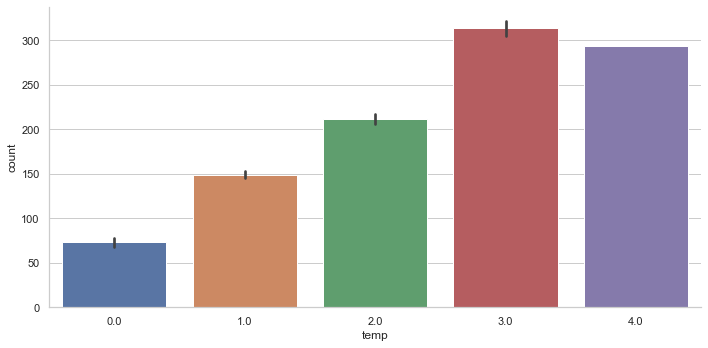

In [926]:
sns.factorplot(x="temp",y='count',data=df,kind='bar', size=5,aspect=2)

In [927]:
df

,holiday,workingday,temp,atemp,humidity,windspeed,count,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,year,month,day,hour,weekend
0,0,0,0.0,1.0,8.0,6.0,16,1,0,0,0,1,0,0,0,0,1,1,0,1
1,0,0,0.0,1.0,8.0,6.0,40,1,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0.0,1.0,8.0,6.0,32,1,0,0,0,1,0,0,0,0,1,1,2,1
3,0,0,0.0,1.0,7.0,6.0,13,1,0,0,0,1,0,0,0,0,1,1,3,1
4,0,0,0.0,1.0,7.0,6.0,1,1,0,0,0,1,0,0,0,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1.0,1.0,5.0,26.0,336,1,0,0,0,0,0,0,1,1,12,19,19,0
10882,0,1,1.0,1.0,5.0,15.0,241,1,0,0,0,0,0,0,1,1,12,19,20,0
10883,0,1,1.0,1.0,6.0,15.0,168,1,0,0,0,0,0,0,1,1,12,19,21,0
10884,0,1,1.0,1.0,6.0,6.0,129,1,0,0,0,0,0,0,1,1,12,19,22,0


In [928]:
#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [929]:
df.columns.to_series().groupby(df.dtypes).groups
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.3478015306433292,
  0.9730611051043251,
  0.34097970770437963,
  1.157816471685922,
  0.7371231661300087]}

In [930]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame


,Modelling Algo,RMSLE
0,RandomForestRegressor,0.347802
1,AdaBoostRegressor,0.973061
2,BaggingRegressor,0.340980
3,SVR,1.157816
4,KNeighborsRegressor,0.737123


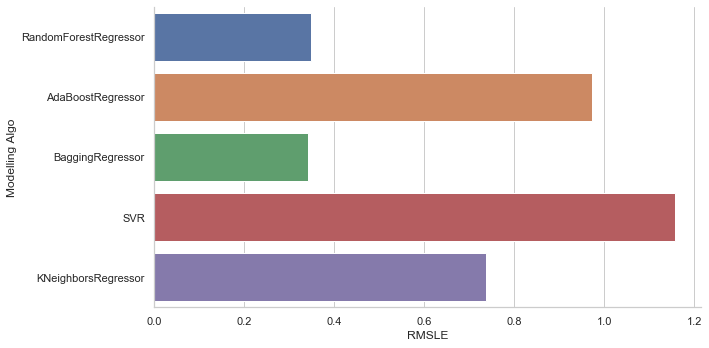

In [931]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)


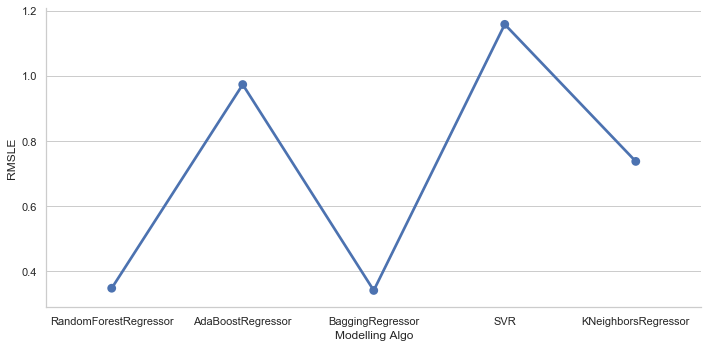

In [932]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)


In [933]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.3343503053028383


In [934]:
clf_rf.best_params_


{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [935]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.7371231661300087


In [936]:
clf_knn.best_params_


{'n_jobs': -1, 'n_neighbors': 5}

In [937]:
# pred=clf_rf.predict(test_df.drop('datetime',axis=1))
# d={'datetime':test['datetime'],'count':pred}
# ans=pd.DataFrame(d)
# ans.to_csv('answer.csv',index=False) # saving to a csv file for predictions on kaggle.

pred=clf_rf.predict(test_df)
d={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False) # saving to a csv file for predictions on kaggle.

In [939]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import random #데이터 전처리
from pandas import DataFrame #데이터 전처리
from collections import Counter #데이터 전처리
from tqdm import tqdm #시간 측정용
from sklearn.feature_extraction.text import CountVectorizer # model setting
from sklearn.model_selection import train_test_split  # model setting
from sklearn.naive_bayes import MultinomialNB  # model 관련
from sklearn.metrics import roc_auc_score  # model 성능 확인
import pandas_profiling
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [941]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

10739

In [949]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [950]:
size = len(x_train)+1

In [960]:
model = Sequential()
model.add(Embedding(size, 32)) # 임베딩 벡터의 차원은 32
model.add(LSTM(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Train on 6443 samples, validate on 1611 samples
Epoch 1/3
6443/6443 [==============================] - ETA: 5:17 - loss: 76623.0781 - acc: 0.015 - ETA: 1:45 - loss: 68244.5156 - acc: 0.005 - ETA: 1:03 - loss: 64350.1875 - acc: 0.009 - ETA: 44s - loss: 71894.5446 - acc: 0.006 - ETA: 34s - loss: 69284.6059 - acc: 0.00 - ETA: 25s - loss: 67617.1003 - acc: 0.00 - ETA: 20s - loss: 66400.7937 - acc: 0.00 - ETA: 17s - loss: 65503.8906 - acc: 0.00 - ETA: 14s - loss: 65594.5406 - acc: 0.00 - ETA: 12s - loss: 63732.1080 - acc: 0.01 - ETA: 11s - loss: 64059.1175 - acc: 0.01 - ETA: 10s - loss: 63211.7517 - acc: 0.00 - ETA: 9s - loss: 63657.0729 - acc: 0.0094 - ETA: 8s - loss: 63949.7563 - acc: 0.008 - ETA: 7s - loss: 64285.1972 - acc: 0.009 - ETA: 7s - loss: 64010.1771 - acc: 0.009 - ETA: 6s - loss: 62918.4712 - acc: 0.008 - ETA: 5s - loss: 63183.4568 - acc: 0.008 - ETA: 5s - loss: 62927.8395 - acc: 0.008 - ETA: 5s - loss: 63095.1488 - acc: 0.008 - ETA: 4s - loss: 62664.5360 - acc: 0.008 - ETA: 4s

In [959]:
print("\n 테스트 정확도: %.6f" % (model.evaluate(x_test, y_test)[1]))


2685/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 252us/sample - loss: 54431.3140 - acc: 0.0071

 테스트 정확도: 0.007076


In [ ]:
print("\n 테스트 정확도: %.6f" % (model.evaluate(x_train, y_train)[1]))

p = model.predict_proba(x_t_p)

submission['smishing'] = p

submission.to_csv("chan_LSTM.csv",index=False) #현재 결과물인 output2를 구글 드라이브에 submission_test라는 이름으로 저장